In [4]:
from PIL import Image

cat_image_pathname = r"./images/cat1.png"
cat_image = Image.open(cat_image_pathname)
cat_image.show()

# Importar o Dataset

Keras é uma biblioteca de rede neural de código aberto escrita em Python. É capaz de funcionar com o TensorFlow, o Microsoft Cognitive Toolkit, o Theano ou o PlaidML. Projetado para permitir a experimentação rápida com redes neurais profundas, ele se concentra em ser fácil de usar, modular e extensível. Wikipedia (inglês)

In [2]:
from keras.datasets import cifar10

labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Dataset will be downloaded if not detected.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  

Using TensorFlow backend.
/media/hamiltonpinheiro/Business/5amClub/OpenSource-Project/AI/servidor_dois/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/media/hamiltonpinheiro/Business/5amClub/OpenSource-Project/AI/servidor_dois/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/media/hamiltonpinheiro/Business/5amClub/OpenSource-Project/AI/servidor_dois/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of nump

# avaliar o dataset

Enter index: 10


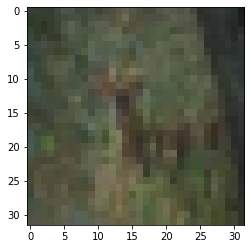

deer


In [3]:
from matplotlib import pyplot as plt

index = int(input("Enter index: "))
display_image = X_train[index]
display_label = y_train[index][0]

plt.imshow(display_image)
plt.show()


print(labels[display_label])

# Construindo um modelo de treinamento

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation="relu", padding="same", kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu", kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])

W0904 21:58:37.724980 139655335884608 deprecation_wrapper.py:119] From /media/hamiltonpinheiro/Business/5amClub/OpenSource-Project/AI/servidor_dois/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 21:58:37.820461 139655335884608 deprecation_wrapper.py:119] From /media/hamiltonpinheiro/Business/5amClub/OpenSource-Project/AI/servidor_dois/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 21:58:37.846416 139655335884608 deprecation_wrapper.py:119] From /media/hamiltonpinheiro/Business/5amClub/OpenSource-Project/AI/servidor_dois/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 21:58:37.962960 139655335884608 deprecation_wrapper.py:119] From /media/hamilton

# Treinar e salvar o modelo

In [8]:
import h5py
from keras.utils import np_utils

new_X_train = X_train.astype("float32")
new_X_test = X_test.astype("float32")
new_X_train /= 255
new_X_test /= 255
new_Y_train = np_utils.to_categorical(y_train)
new_Y_test = np_utils.to_categorical(y_test)

model.fit(new_X_train, new_Y_train, epochs=3, batch_size=32)
model.save("modelo_treinado.h5")

W0904 21:58:41.858082 139655335884608 deprecation.py:323] From /media/hamiltonpinheiro/Business/5amClub/OpenSource-Project/AI/servidor_dois/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/3
50000/50000 [==============================] - 88s 2ms/step - loss: 1.9310 - acc: 0.3110
Epoch 2/3
50000/50000 [==============================] - 88s 2ms/step - loss: 1.6384 - acc: 0.4193
Epoch 3/3
50000/50000 [==============================] - 84s 2ms/step - loss: 1.4892 - acc: 0.4723


# Testando o modelo treinado

In [7]:
import numpy as np
from keras.models import load_model

model = load_model("modelo_treinado.h5")

input_path = r"./images/vejabem.jpg"
input_image = Image.open(input_path)
input_image = input_image.resize((32, 32), resample=Image.LANCZOS)
image_array = np.array(input_image)
image_array =image_array.astype("float32")
image_array /= 255.0
image_array = image_array.reshape(1, 32, 32, 3)

answer = model.predict(image_array)
input_image.show()
print(labels[np.argmax(answer)])

automobile
